In [7]:
import os
import sys
import pandas as pd
import yfinance as yf
import numpy as np
sys.path.append(os.path.join('Momentum_additional_files'))

from config import *
from helper import *
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

price_data_df = collecting_data(START_DATE, END_DATE, DATA_PRICE_LOC, DATA_DIV_LOC)
relative_df = get_relative(price_data_df)

In [ ]:
open_positions, total_gained_valued = momentum_strategy(price_data_df, relative_df)
avg_gain, p_value = calc_one_sided_test(open_positions)  
print(f'Average gain:{avg_gain}. The p-value: {p_value}')

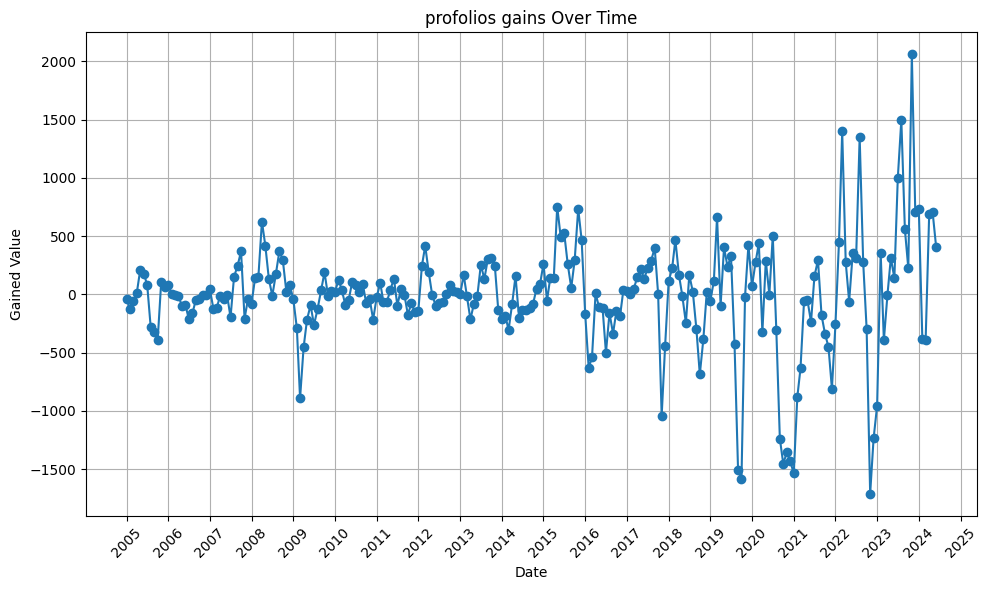

In [3]:
plot_profolios(open_positions)   

# sub group of dates 2004-2017

In [37]:
end_date = '2017-12-31'
sub_relative_df = relative_df.loc[:end_date]
sub_open_positions, sub_total_gained_valued = momentum_strategy(price_data_df, sub_relative_df)
sub_avg_gain, sub_p_value = calc_one_sided_test(sub_open_positions)  
print(f'Average gain:{sub_avg_gain}. The p-value: {sub_p_value}')

Average gain:12.09719351520175. The p-value: 0.2576472534725621


In [38]:
strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in open_positions.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Annualized Return: -0.0564
Volatility: 0.1864
Sharpe Ratio: -16.2016
Max Drawdown: -0.8207
VaR 1%: -0.1283
VaR 5%: -0.0868
Alpha: -0.7608


# Calc metrics

In [14]:
b_date, e_date = calc_profolios_dates(START_DATE, END_DATE, FORMATION_PERIOD_MONTHS, HOLDING_PERIOD_MONTHS)
sp500 = yf.download('^GSPC', start=b_date, end=e_date, interval='1mo')[STOCK_TIME]
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)
sp500_returns = sp500.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [39]:
strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in sub_open_positions.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Annualized Return: -0.0386
Volatility: 0.2019
Sharpe Ratio: -14.8719
Max Drawdown: -0.7198
VaR 1%: -0.1701
VaR 5%: -0.0812
Alpha: -0.5484


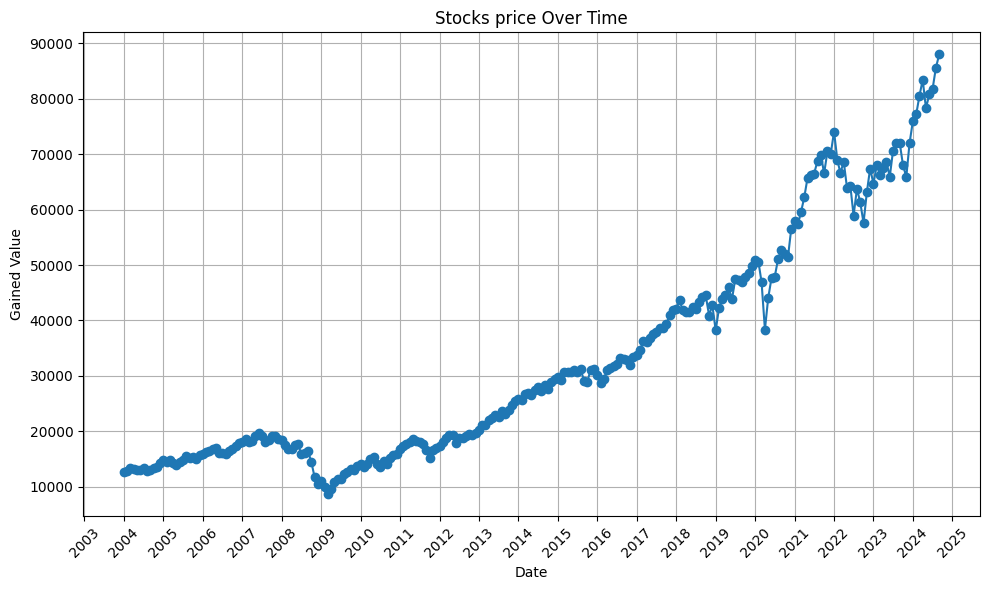

In [50]:
df = price_data_df['Open'] + price_data_df['Dividends']
df = df.sum(axis=1)
plt.figure(figsize=(10, 6))
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df.values, marker='o', linestyle='-')
plt.title('Stock prices Over Time')
plt.xlabel('Date')
plt.ylabel('Gained Value')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.grid()
plt.tight_layout() 
plt.show()

In [45]:
df.sum(axis=1)

Date
2004-01-01 00:00:00+00:00    12606.166284
2004-02-01 00:00:00+00:00    12876.906022
2004-03-01 00:00:00+00:00    13292.548232
2004-04-01 00:00:00+00:00    13251.976449
2004-05-01 00:00:00+00:00    12932.257022
                                 ...     
2024-05-01 00:00:00+00:00    78317.473440
2024-06-01 00:00:00+00:00    80788.074893
2024-07-01 00:00:00+00:00    81727.095240
2024-08-01 00:00:00+00:00    85606.214193
2024-09-01 00:00:00+00:00    88038.186525
Length: 249, dtype: float64

In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
for k,v in msft.info.items():
    if 'Risk' in k:
        print(k,v)